# Mall Customer Segmentation Data Project

1. Motivation

2. Data Information

3. Dependences

    Importing the labries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


#    4. Data Exploration

In this section we are doing a little bit of data exploration, checking for null values, object data types and other things we might consider in order to keep our data clean and well structured.

In [2]:
data=pd.read_csv('Mall_Customers.csv')
def summarizing(Data):
    print(" \n We read the csv and print the first 5 rows \n")
    print(Data.head())
    print("\n Checking the size of our data \n")
    print(Data.shape)
    print(" \n Lets analyze the data at the bottom \n")
    print(Data.tail())
    print('\n Describe the data all  columns in particular format \n')
    print(data.describe())
    print('\n Looking for null values \n')
    print(Data.isnull().sum())
    print('\n Checking datatypes \n')
    print(Data.info())
    

In [3]:
summarizing(data)

 
 We read the csv and print the first 5 rows 

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

 Checking the size of our data 

(200, 5)
 
 Lets analyze the data at the bottom 

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

 De

In [4]:
#Replacing objects for numerical values
data['Gender'].replace(['Female','Male'], [0,1],inplace=True)

In [5]:
def outliers(Data_Columns,data):
    _25th_percentile=np.percentile(Data_Columns,25)
    _75th_percentile=np.percentile(Data_Columns,75)
    IQR=_75th_percentile-_25th_percentile
    Higher_fence=_75th_percentile+1.5*IQR
    Lower_fence=_25th_percentile-1.5*IQR
    data=data[(Lower_fence<Data_Columns)]# & (data['Annual Income (k$)']>=Higher_fence)]
    data=data[(Higher_fence>=Data_Columns)]# & (data['Annual Income (k$)']>=Higher_fence)]
    return data


In [6]:
outliers(data['Spending Score (1-100)'],data)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# 5. Data Visualization

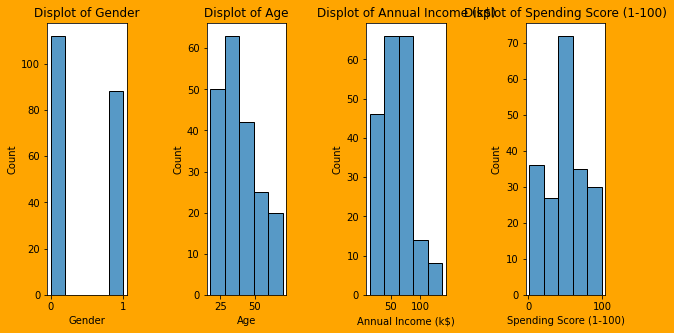

In [7]:
plt.figure(1,figsize=(10,5))
fig = plt.gcf();
fig.set_facecolor('orange')
n=0
for x in ['Gender','Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=1 , wspace=1)
    sns.histplot(data[x],bins=5)
    plt.title('Displot of {}'.format(x))
plt.show()


In [8]:
def presentation_data(data):
    plt.figure(1,figsize=(10,5))
    fig = plt.gcf();
    fig.set_facecolor('orange')
    n=0
    for x in range(1,len(data.columns)): 
        n+=1
        plt.subplot(1,4,n)
        plt.subplots_adjust(hspace=0.1 , wspace=0.1)
        sns.histplot(data[data.columns[x]],bins=50)
        plt.title('Displot of {}'.format(x))
    plt.show()
    plt.figure(figsize=(10,5))
    sns.countplot(y='Gender' , data=data)
    plt.show()


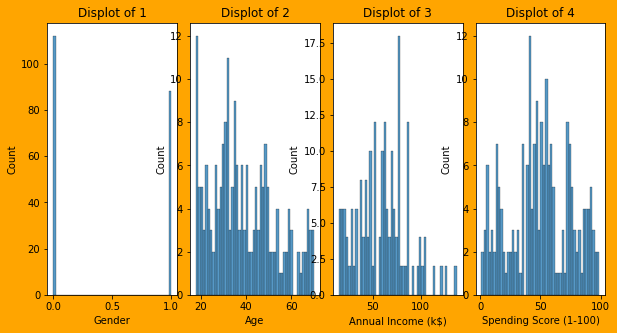

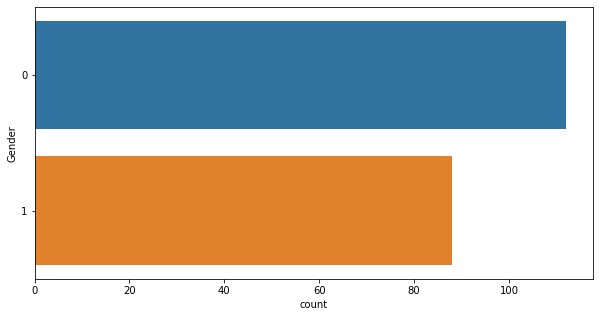

In [9]:
presentation_data(data)

# As the Data having gender which is categorical data(Nominal)

In [10]:
data.drop('CustomerID',axis=1,inplace=True)

In [11]:
def Categorical_Representation(data,Col_name):
    for i in data[Col_name].unique():
        #print(i)
        print('Gender_'+('Male' if i==1 else 'Female'),'\n')
        print((data[data[Col_name]==i].describe()),'\n')
        #sn

In [12]:
Categorical_Representation(data,'Gender')

Gender_Male 

       Gender        Age  Annual Income (k$)  Spending Score (1-100)
count    88.0  88.000000           88.000000               88.000000
mean      1.0  39.806818           62.227273               48.511364
std       0.0  15.514812           26.638373               27.896770
min       1.0  18.000000           15.000000                1.000000
25%       1.0  27.750000           45.500000               24.500000
50%       1.0  37.000000           62.500000               50.000000
75%       1.0  50.500000           78.000000               70.000000
max       1.0  70.000000          137.000000               97.000000 

Gender_Female 

       Gender         Age  Annual Income (k$)  Spending Score (1-100)
count   112.0  112.000000          112.000000              112.000000
mean      0.0   38.098214           59.250000               51.526786
std       0.0   12.644095           26.011952               24.114950
min       0.0   18.000000           16.000000                5.0000

In [13]:
def Violen_plt(data,Violen_col):
    plt.figure(1,figsize=(20,8))
    fig = plt.gcf();
    fig.set_facecolor('orange')
    n=0
    for x in range(1,len(data.columns)): 
        n+=1
        plt.subplot(1,len(data.columns),n)
        sns.set(style='whitegrid')
        plt.subplots_adjust(hspace=.3 , wspace=.3)
        sns.violinplot(data[data.columns[x]],data[Violen_col],bins=10,linewidth=2);
        plt.title('Displot of {}'.format(x));
        #plt.legend(data.columns[x])
    plt.show();

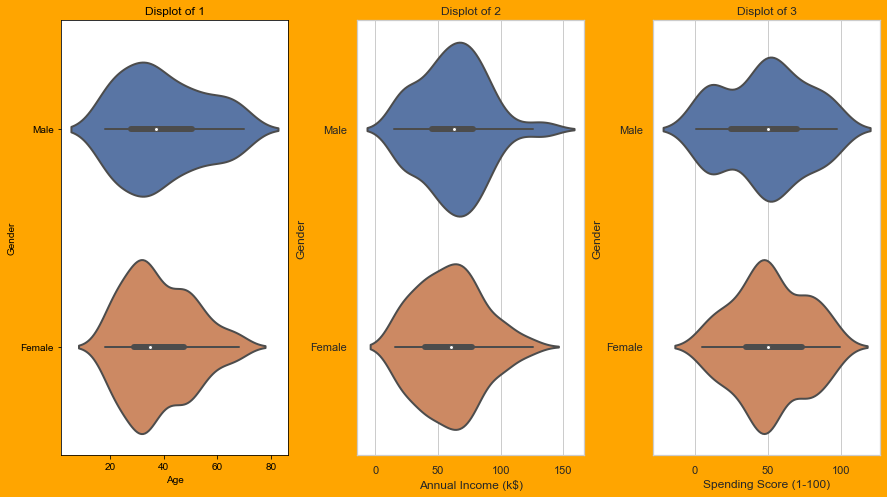

In [14]:
#Replacing objects for original values
data['Gender'].replace([1,0], ['Male','Female'],inplace=True)
Violen_plt(data,'Gender')

In [15]:
def Count_of(data, nod):
    result_values=[]
    result_keys=[]
    for i in range(min(data),max(data),nod):
        result_keys.append(i)
        result_values.append('Values '+str(i)+'-'+str(i+nod-1))
    results=dict(zip(result_values,result_keys))
    result_count=[]
    for key, val in results.items():
        key=[]
        for i in data:
            if val<=i:
                key.append(i)
        result_count.append(len(key))
    for  result_count_1 in range(0,len(result_count)-1):
        for  result_count_2 in range(result_count_1+1,result_count_1,-1):
               result_count[result_count_1]=result_count[result_count_1]-result_count[result_count_2]
    df_=pd.DataFrame(result_count,result_values)
    df_.rename({0:'NOC'},axis=1,inplace=True)
    plt.figure(figsize=(15,6))
    sns.barplot(x=df_.index,y=df_['NOC'])
    plt.title('Number of costomer in the specified range')
    plt.xlabel('Number of costomer')
    plt.ylabel('Spending Score')
    plt.xticks(rotation=45)
    #plt.xscale(lower())
    for i, val in enumerate(df_.index):
        y = df_.loc[val].sum()
        plt.text(i, y, str(y), ha="center",fontsize = 15,         color ='red')

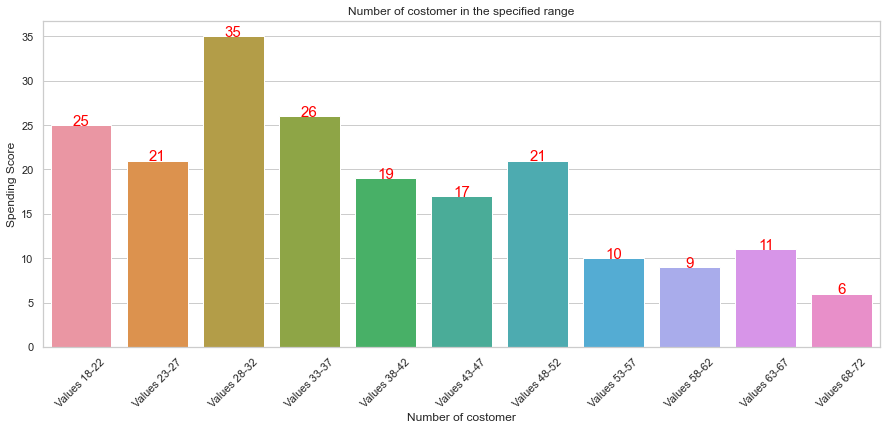

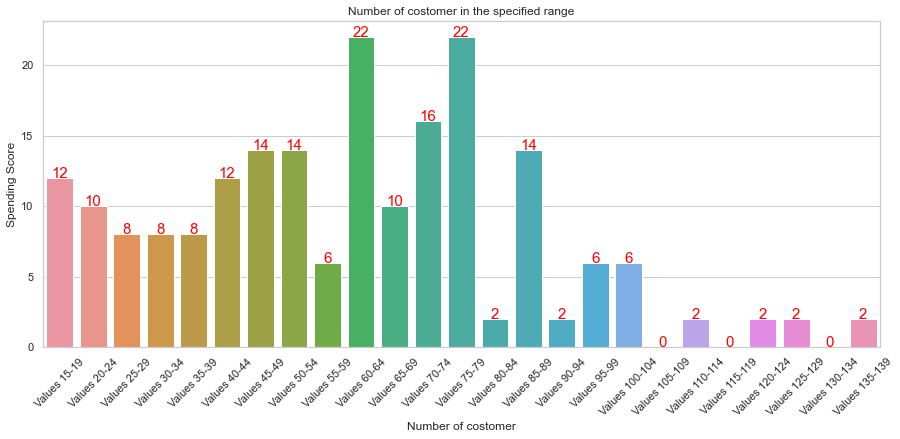

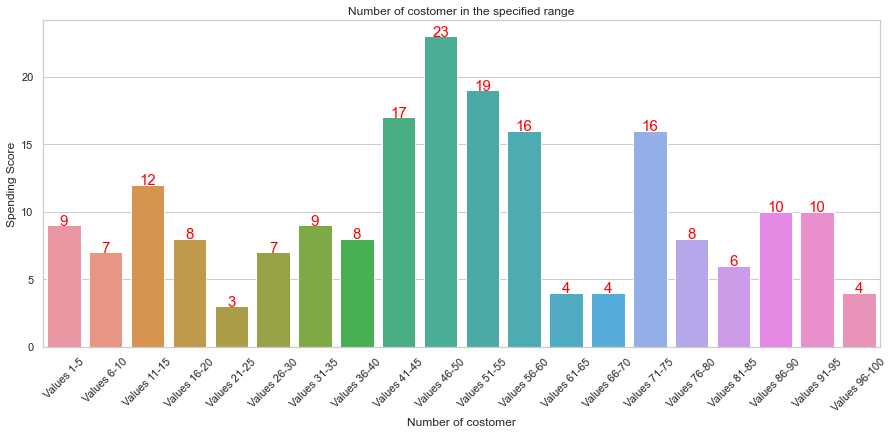

In [16]:
for i in range(1,len(data.columns)): 
   # print(data.columns[i])
    Count_of(data[data.columns[i]],5)

In [17]:
def Count_of_Percentage(data, nod):
    result_values=[]
    result_keys=[]
    for i in range(min(data),max(data),nod):
        result_keys.append(i)
        result_values.append('Values '+str(i)+'-'+str(i+nod-1))
    results=dict(zip(result_values,result_keys))
    result_count=[]
    for key, val in results.items():
        key=[]
        for i in data:
            if val<=i:
                key.append(i)
        result_count.append(len(key))
    for  result_count_1 in range(0,len(result_count)-1):
        for  result_count_2 in range(result_count_1+1,result_count_1,-1):
               result_count[result_count_1]=result_count[result_count_1]-result_count[result_count_2]
    df_=pd.DataFrame(result_count,result_values)
    df_.rename({0:'NOC'},axis=1,inplace=True)
    df_['NOC_Percentage']=df_['NOC']*100/sum(df_['NOC'])
    df_.drop('NOC',axis=1,inplace=True)
    #print(df_)
    plt.figure(figsize=(15,6))
    sns.barplot(x=df_.index,y=df_['NOC_Percentage'])
    plt.title('Number of costomer in the specified range')
    plt.xlabel('Number of costomer')
    plt.ylabel('Spending Score')
    plt.xticks(rotation=90)
    #plt.xscale(lower())
    for i, val in enumerate(df_.index):
        y = df_.loc[val].sum()
        plt.text(i, y, str(y)+'%', ha="center",fontsize = 15,         color ='red')

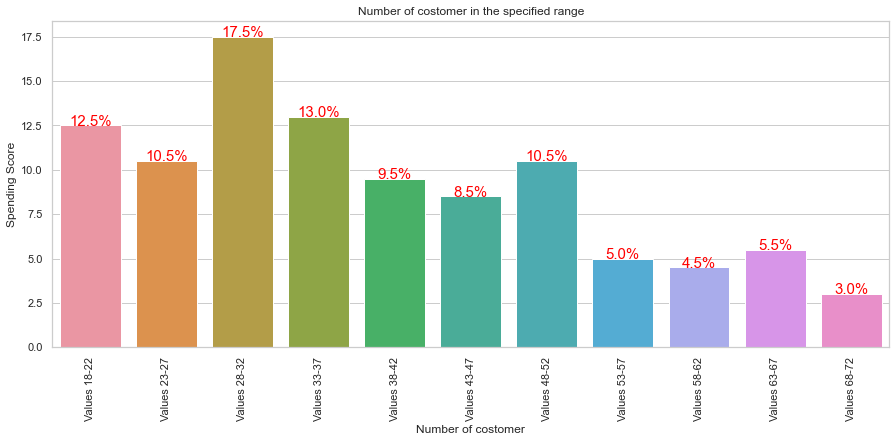

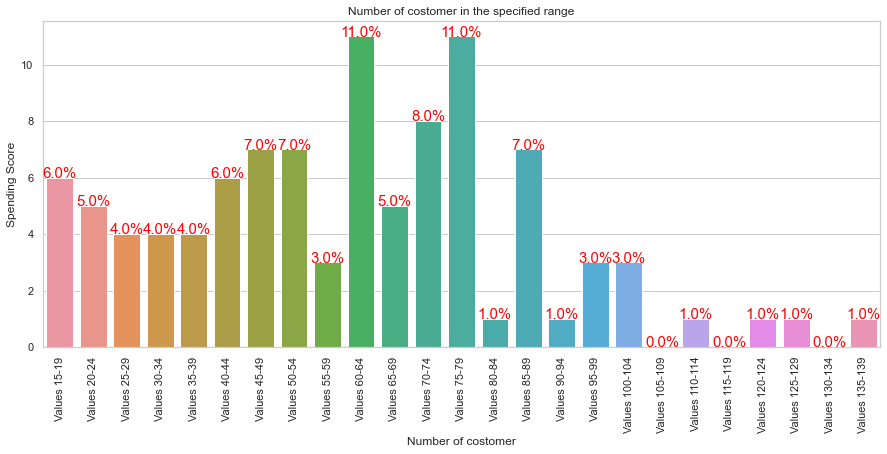

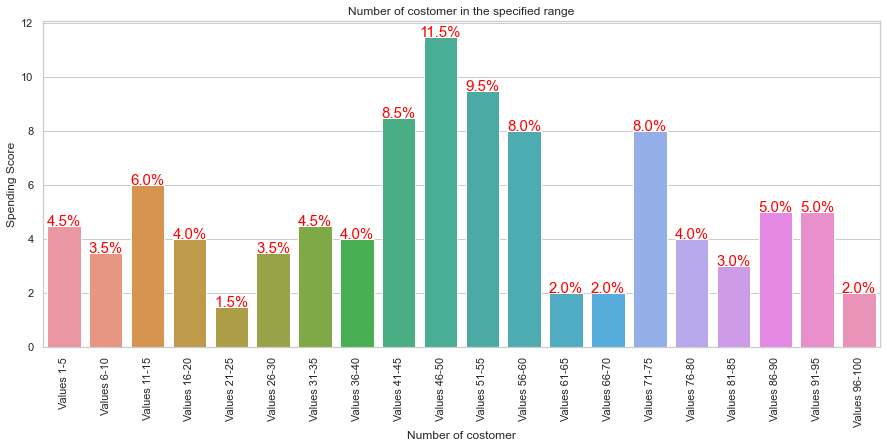

In [18]:
for i in range(1,len(data.columns)): 
   # print(data.columns[i])
    Count_of_Percentage(data[data.columns[i]],5)

In [19]:
def kkmeans_values(Data,Col_name1,Col_name2,Clusters,Line_width_plt, col_plt,
                  front_size_cluster,col_cluster):
    x1=Data.loc[:,[Col_name1,Col_name2]].values
    wcss=[]
    for k in range(1,Clusters):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(x1)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(15,6))
    plt.grid(True)
    plt.plot(range(1,Clusters),wcss,lw=Line_width_plt,color=(col_plt),marker='3');
    plt.xlabel('K_Means',fontsize=50)
    plt.ylabel('WCSS',fontsize=50)
    for i,j in enumerate(wcss):
        j =wcss[i]#.sum()
        plt.text((i),(j),str(i),fontsize=front_size_cluster,color=(col_cluster));
    plt.show();
    Consider_Cluster=int(input("\n Please enter the Number of Cluster considering,\n"))
    kmeans=KMeans(n_clusters=Consider_Cluster)
    k=kmeans.fit_predict(x1)
    plt.figure(figsize=(15,8))
    sns.scatterplot(Col_name1,Col_name2,data=data,c=kmeans.labels_,cmap='rainbow')
    sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='Black',s=100
                , markers='8');

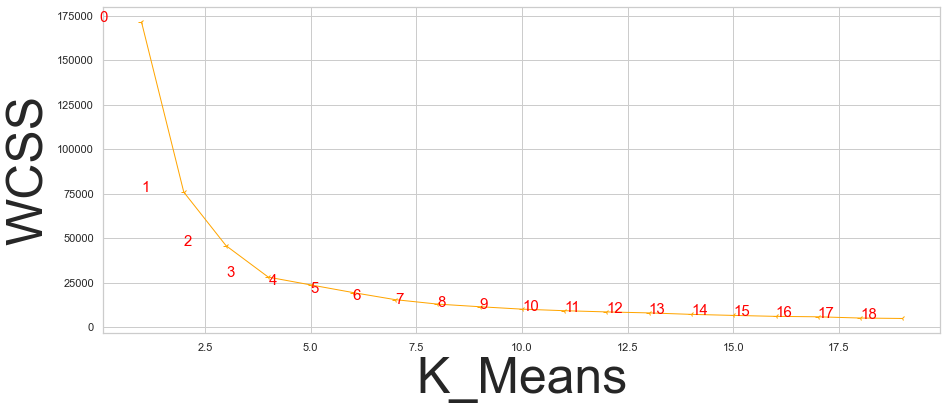


 Please enter the Number of Cluster considering,
5


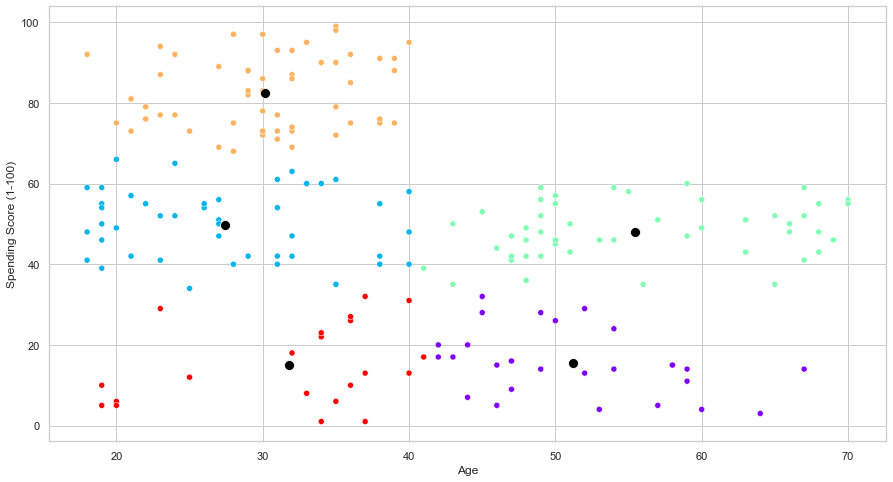

In [20]:
kkmeans_values(data,'Age','Spending Score (1-100)',20,1,'Orange',15,'red')

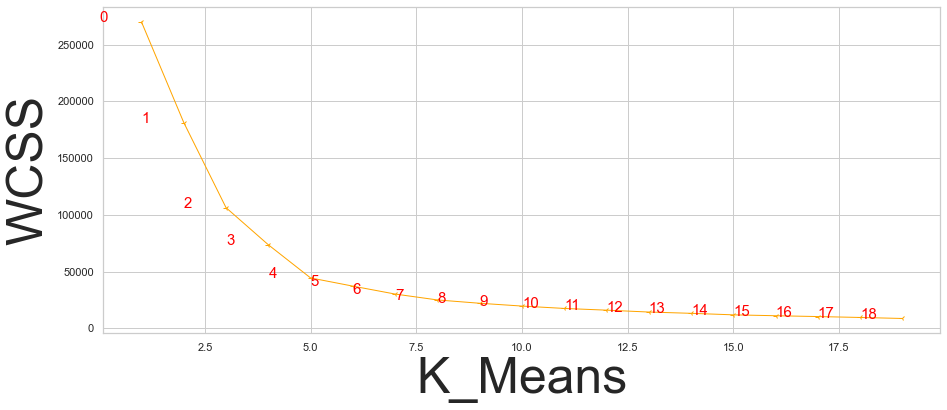


 Please enter the Number of Cluster considering,
5


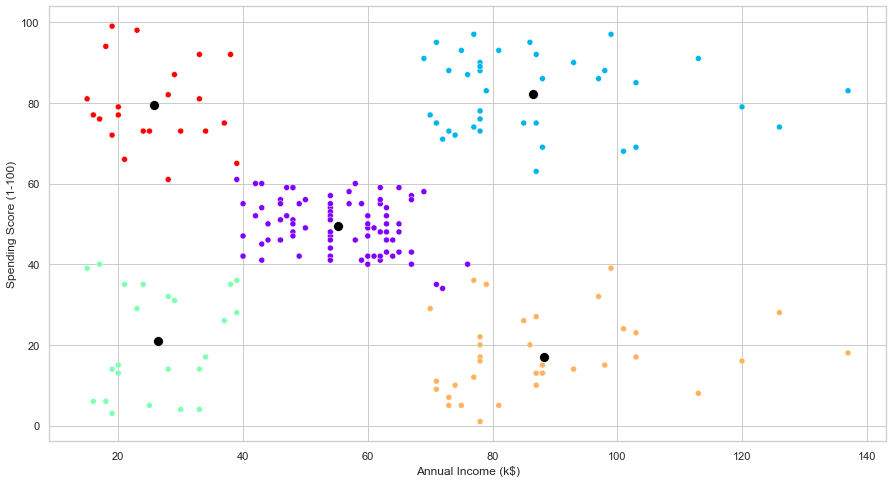

In [21]:
kkmeans_values(data,'Annual Income (k$)','Spending Score (1-100)',20,1,'Orange',15,'red')

In [23]:
def kkmeans_values_3rd(Data,Col_name1,Col_name2,Col_name3,Clusters,Line_width_plt, col_plt,
                  front_size_cluster,col_cluster):
    x1=Data.loc[:,[Col_name1,Col_name2]].values
    wcss=[]
    for k in range(1,Clusters):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(x1)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(15,6))
    plt.grid(True)
    plt.plot(range(1,Clusters),wcss,lw=Line_width_plt,color=(col_plt),marker='3');
    plt.xlabel('K_Means',fontsize=50)
    plt.ylabel('WCSS',fontsize=50)
    for i,j in enumerate(wcss):
        j =wcss[i]#.sum()
        plt.text((i),(j),str(i),fontsize=front_size_cluster,color=(col_cluster));
    plt.show();
    Consider_Cluster=int(input("\n Please enter the Number of Cluster considering \n"))
    kmeans=KMeans(n_clusters=Consider_Cluster)
    k=kmeans.fit_predict(x1)
    Data["Label"]=k
    #print(Data)
    #for i range()
    fig=plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Data[Col_name1][Data["Label"]==0],
                   Data[Col_name2][Data["Label"]==0],Data[Col_name3][Data["Label"]==0],c='black',s=50)
    ax.scatter(Data[Col_name1][Data["Label"]==1],Data[Col_name2][Data["Label"]==1],
               Data[Col_name3][Data["Label"]==1],c='yellow',s=100)
    ax.scatter(Data[Col_name1][Data["Label"]==2],
                   Data[Col_name2][Data["Label"]==2],Data[Col_name3][Data["Label"]==2],c='purple',s=150)
    ax.scatter(Data[Col_name1][Data["Label"]==3],Data[Col_name2][Data["Label"]==3],
               Data[Col_name3][Data["Label"]==3],c='green',s=200)
    ax.scatter(Data[Col_name1][Data["Label"]==4],Data[Col_name2][Data["Label"]==4],
               Data[Col_name3][Data["Label"]==4],c='Brown',s=250)
    plt.xlabel(Col_name1)
    plt.ylabel(Col_name2)
    ax.set_zlabel(Col_name3)
        #ax.scatter(Col_name1,Col_name2,Col_name3,data=data,c=kmeans.labels_,cmap='rainbow')
        #ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='Black',s=100);

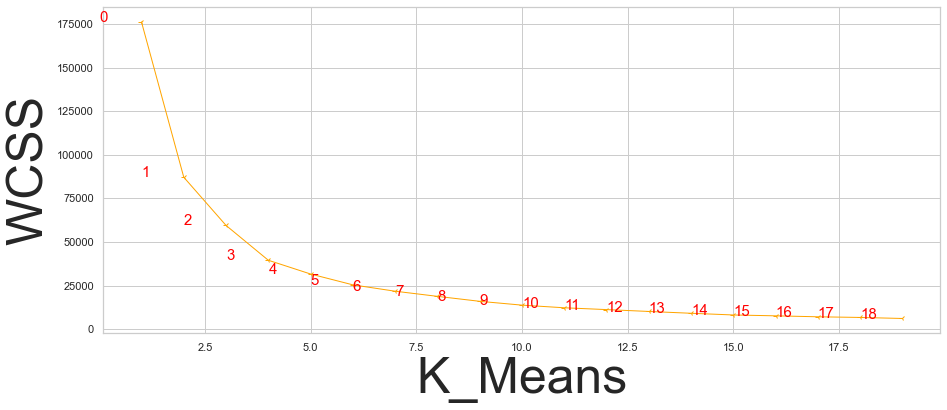


 Please enter the Number of Cluster considering 
5


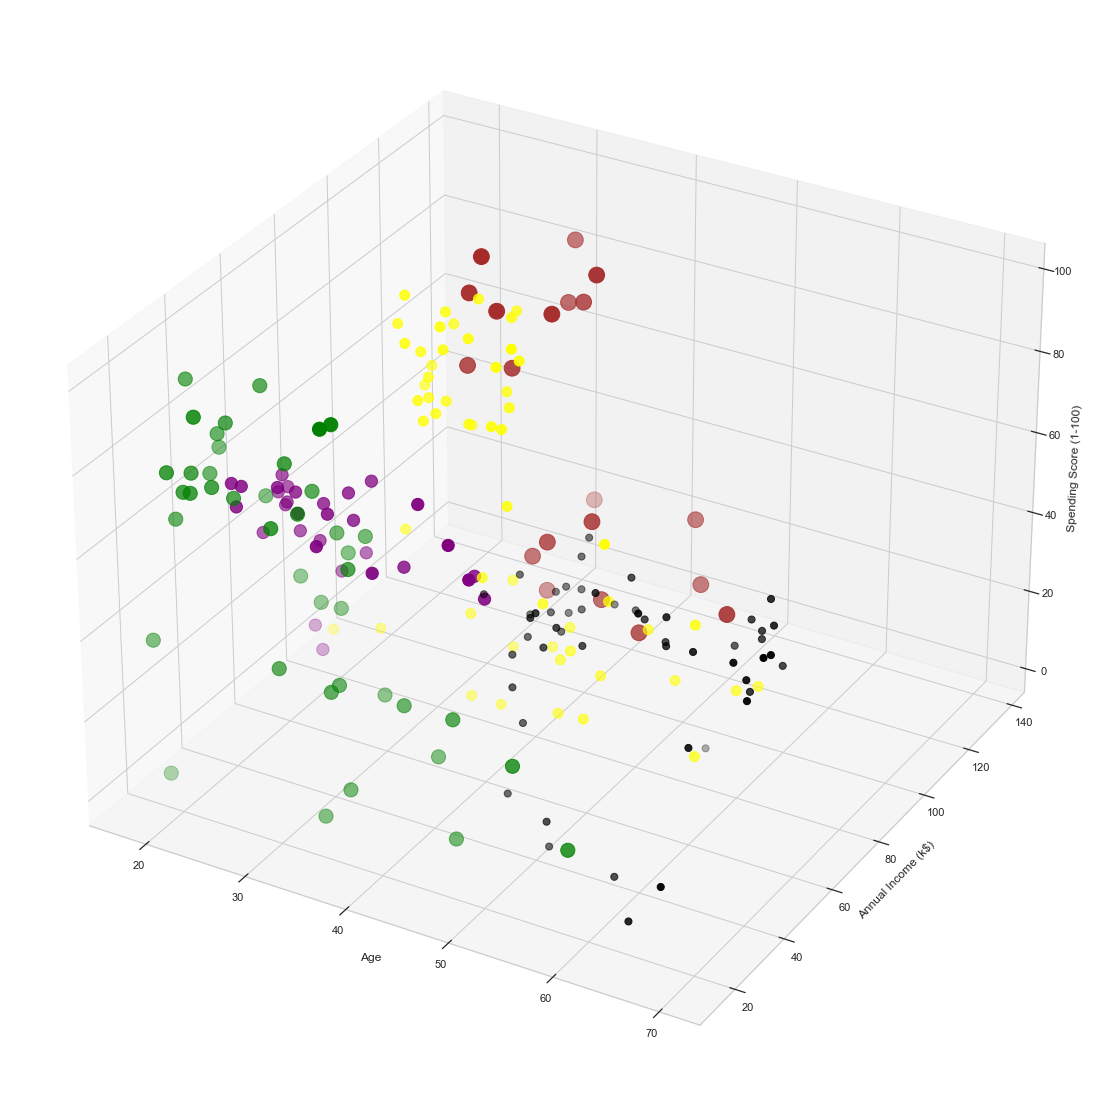

In [24]:
kkmeans_values_3rd(data,'Age','Annual Income (k$)','Spending Score (1-100)',20,1,'Orange',15,'red')